In [1]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
from __future__ import print_function
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DayLocator, HourLocator, DateFormatter, drange
from matplotlib.colors import LogNorm
import netCDF4 
import dateutil.parser
%matplotlib inline

/Users/scollis/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/scollis/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/scollis/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/scollis/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the c

In [2]:
status_dir = '/Users/scollis/temp/status/'
all_files = os.listdir(status_dir)
print(len(all_files))

677046


In [3]:
max_rf =[]
mean_rf = []
good_files = []
datetimes = []
for filen in all_files:
    if 'nc' in filen:
        fh = open(status_dir+filen)
        line = fh.readline()[78::]
        fh.close()
        try:
            p1 = float(line.split(' ')[0])
            p2 = float(line.split(' ')[1])
            max_rf.append(p1)
            mean_rf.append(p2)
            good_files.append(file)
            datetimes.append( datetime.datetime.strptime(filen[6:21], '%Y%m%d_%H%M%S'))
        except:
            pass
    else:
        fh = open(status_dir+filen)
        line = fh.readline()[23::]
        fh.close()
        try:
            p1 = float(line.split(' ')[0])
            p2 = float(line.split(' ')[1])
            max_rf.append(p1)
            mean_rf.append(p2)
            good_files.append(filen)
            datetimes.append(datetime.datetime.strptime(filen[4:-11], '%Y%m%d_%H%M%S'))
        except:
            pass
    
mean_rf = np.array(mean_rf)
max_rf = np.array(max_rf)
datetimes = np.array(datetimes)

In [4]:
print(len(all_files), len(good_files))

677046 670353


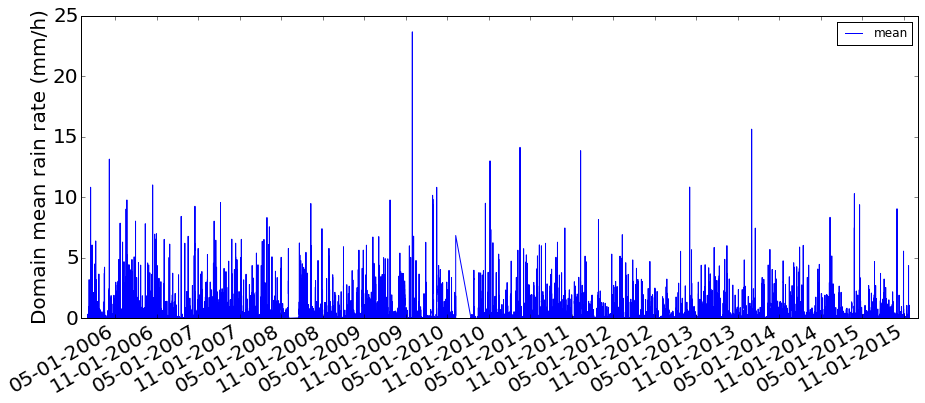

In [22]:
fig = plt.figure(figsize = [15,6])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b-', label = 'mean')
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval = 6))
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('Domain mean rain rate (mm/h)', size = 20)
plt.legend(loc = 2)
#ax2 = plt.twinx()
#plt.plot(mdates.date2num(datetimes), max_rf, 'r.', label = 'max')
#plt.ylabel('Max rain rate in domain (mm/h)')
#plt.ylim([0,350])

plt.xlim([mdates.date2num(datetime.datetime(2005,12,1)), mdates.date2num(datetime.datetime(2016,1,1))])
plt.legend()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


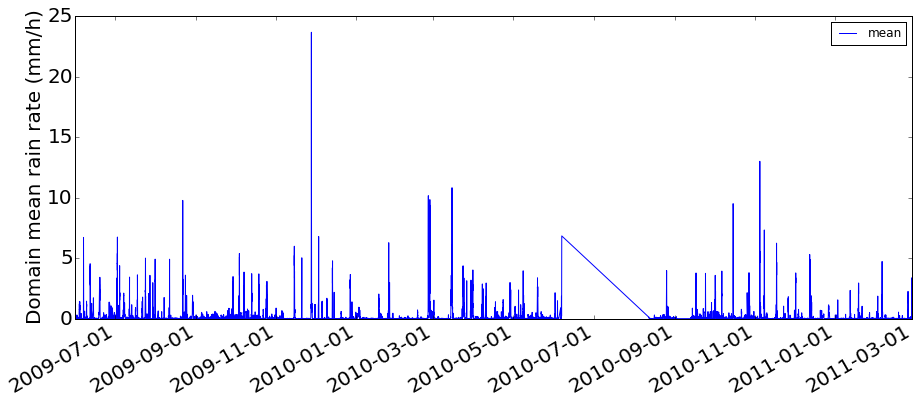

In [6]:
fig = plt.figure(figsize = [15,6])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b-', label = 'mean')
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval = 2))
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('Domain mean rain rate (mm/h)', size = 20)
plt.legend(loc = 2)
#ax2 = plt.twinx()
#plt.plot(mdates.date2num(datetimes), max_rf, 'r.', label = 'max')
#plt.ylabel('Max rain rate in domain (mm/h)')
#plt.ylim([0,350])

plt.xlim([mdates.date2num(datetime.datetime(2009,6,1)), mdates.date2num(datetime.datetime(2011,3,1))])
plt.legend()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


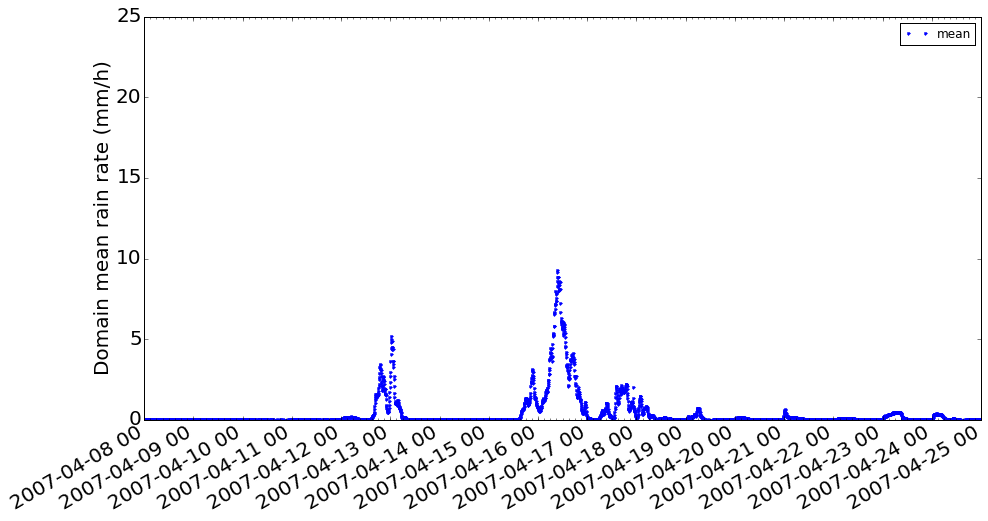

In [7]:
fig = plt.figure(figsize = [15,8])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.', label = 'mean')
ax = plt.gca()
plt.xlim([mdates.date2num(datetime.datetime(2007,4,8)), mdates.date2num(datetime.datetime(2007,4,25))])

ax.xaxis.set_major_locator(DayLocator(interval = 1))
ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 23, 3)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H'))
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.ylabel('Domain mean rain rate (mm/h)', size = 20)

plt.legend()

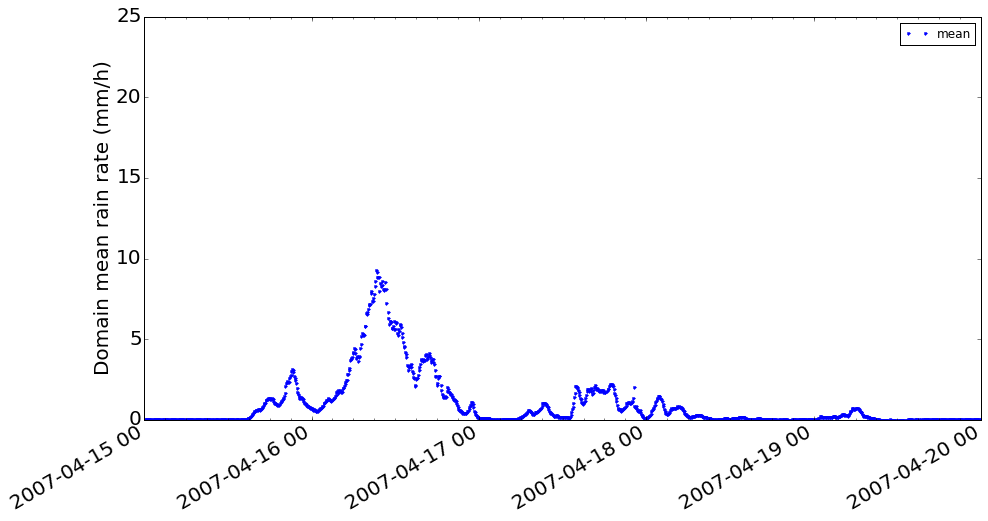

In [8]:
fig = plt.figure(figsize = [15,8])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.', label = 'mean')
ax = plt.gca()
plt.xlim([mdates.date2num(datetime.datetime(2007,4,15)), mdates.date2num(datetime.datetime(2007,4,20))])

ax.xaxis.set_major_locator(DayLocator(interval = 1))
ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 23, 3)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H'))
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.ylabel('Domain mean rain rate (mm/h)', size = 20)

plt.legend()

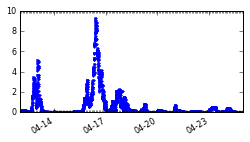

In [9]:
fig = plt.figure(figsize = [4,2])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.', label = 'mean')
ax = plt.gca()
plt.xlim([mdates.date2num(datetime.datetime(2007,4,12)), mdates.date2num(datetime.datetime(2007,4,25))])

ax.xaxis.set_major_locator(DayLocator(interval = 3))
ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 23, 2)))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.fmt_xdata = DateFormatter('%m-%d')
fig.autofmt_xdate()
plt.ylim([0,10])
cnt = plt.gcf()
fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
#plt.ylabel('Domain mean rain rate (mm/h)', size = 4)

#plt.legend()

In [10]:
print(len(max_rf))
print(len(mean_rf))

670353
670353


In [11]:
hours = np.linspace(0,23,24)
boxed_means_hours = []
months = np.linspace(1,12,12)
boxed_means_months = []
weeks = np.linspace(1,52, 52)
boxed_means_weeks = []

for hour in hours:
    foo = [ a.hour == hour for a in datetimes]
    boxed_means_hours.append(mean_rf[np.where(foo)])

months = np.linspace(1,12,12)
boxed_means_months = []
for month in months:
    foo = [ a.month == month for a in datetimes]
    boxed_means_months.append(mean_rf[np.where(foo)])


hrly = np.array([a.mean() for a in boxed_means_hours])
monthly = np.array([a.mean() for a in boxed_means_months])
nbins = 50
rr = (0.05, 3)
hist_rf = np.zeros([len(hours), nbins])
for i in range(len(hours)):
    bine = np.histogram(boxed_means_hours[i], bins=nbins, range= rr)[1]
    hist_rf[i,:] = np.histogram(boxed_means_hours[i], bins=nbins, range= rr)[0]
    #print(np.histogram(boxed_means[i], bins=nbins, range=(0.1, 1))[0])
lt = (hours - 5) % 24
lts = ["%d" % a for a in lt] 
hist_rf_monthly = np.zeros([len(months), nbins])
for i in range(len(months)):
    bine2 = np.histogram(boxed_means_months[i], bins=nbins, range= rr)[1]
    hist_rf_monthly[i,:] = np.histogram(boxed_means_months[i], bins=nbins, range= rr)[0]
    #print(np.histogram(boxed_means[i], bins=nbins, range=(0.1, 1))[0])

In [12]:
monthly = np.array([a.mean() for a in boxed_means_months])
monthly50 = np.array([np.percentile(a, 50) for a in boxed_means_months])
monthly25 = np.array([np.percentile(a, 25) for a in boxed_means_months])
monthly75 = np.array([np.percentile(a, 75) for a in boxed_means_months])
hrly = np.array([a.mean() for a in boxed_means_hours])
hrly50 = np.array([np.percentile(a, 50) for a in boxed_means_hours])
hrly25 = np.array([np.percentile(a, 25) for a in boxed_means_hours])
hrly75 = np.array([np.percentile(a, 75) for a in boxed_means_hours])


/Users/scollis/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


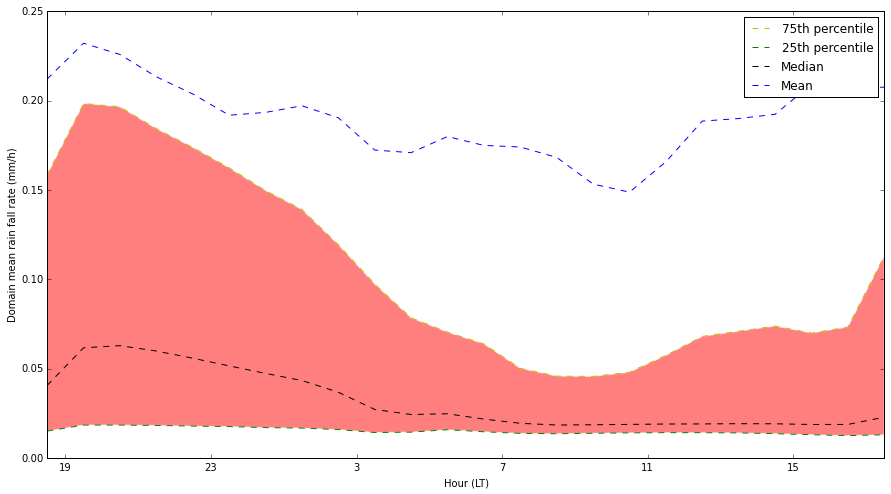

In [13]:
fig = plt.figure(figsize = [15,8])

plt.fill_between(hours, hrly25, hrly75, color='w', facecolor = 'red', alpha = 0.5)
plt.plot(hours, hrly75, 'y--', label = '75th percentile')
plt.plot(hours, hrly25, 'g--', label = '25th percentile')

plt.plot(hours, hrly50, 'k--', label = 'Median')
plt.plot(hours, hrly, 'b--', label = 'Mean')
mty = plt.xticks(hours[::4]+.5, lts[::4])
plt.xlim([0,23])
plt.xlabel('Hour (LT)')
plt.ylabel('Domain mean rain fall rate (mm/h)')
plt.legend()




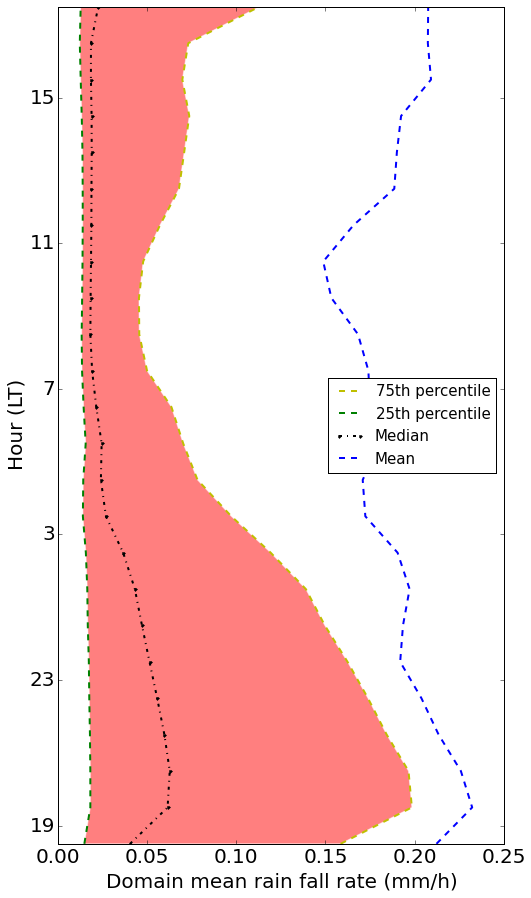

In [27]:
fig = plt.figure(figsize = [8,15])

plt.fill_betweenx(hours,hrly25, hrly75, color='w', facecolor = 'red', alpha = 0.5)
plt.plot(hrly75,hours, 'y--', label = '75th percentile', linewidth = 2.0)
plt.plot( hrly25,hours, 'g--', label = '25th percentile', linewidth = 2.0)

plt.plot( hrly50,hours, 'k.-.', label = 'Median', linewidth = 2.0)
plt.plot( hrly,hours, 'b--', label = 'Mean', linewidth = 2.0)
mty = plt.yticks(hours[::4]+.5, lts[::4])
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.ylim([0,23])
plt.ylabel('Hour (LT)', size = 20)
plt.xlabel('Domain mean rain fall rate (mm/h)', size = 20)
plt.legend(loc = 5, fontsize = 15)




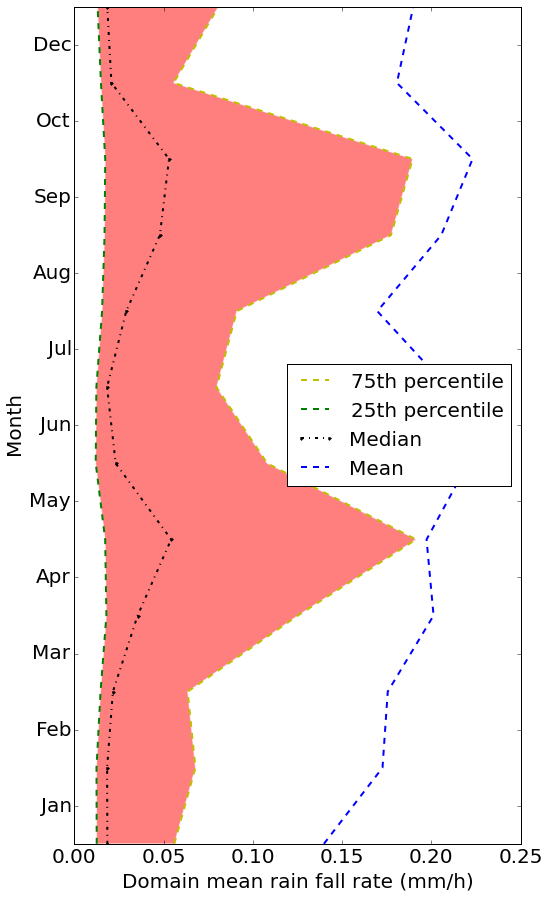

In [28]:
fig = plt.figure(figsize = [8,15])

plt.fill_betweenx(months,monthly25, monthly75, color='w', facecolor = 'red', alpha = 0.5)
plt.plot(monthly75,months, 'y--', label = '75th percentile', linewidth = 2.0)
plt.plot( monthly25,months, 'g--', label = '25th percentile', linewidth = 2.0)

plt.plot( monthly50,months, 'k.-.', label = 'Median', linewidth = 2.0)
plt.plot( monthly,months, 'b--', label = 'Mean', linewidth = 2.0)
montext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Dec']
mty = plt.yticks(months + 0.5, montext)
plt.ylim([1,12])
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.ylabel('Month', size = 20)
plt.xlabel('Domain mean rain fall rate (mm/h)', size = 20)
plt.legend(loc = 5, fontsize = 20)




<matplotlib.colorbar.Colorbar instance at 0x117d7fe18>

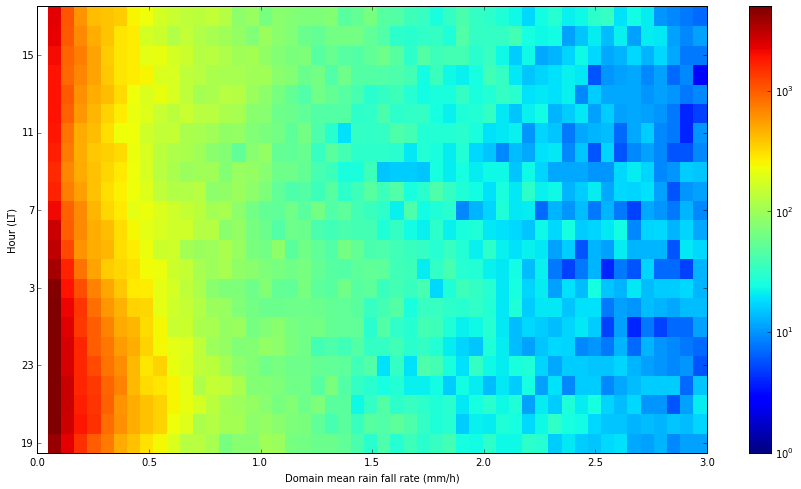

In [16]:
fig = plt.figure(figsize = [15,8])
plt.pcolormesh(bine, hours, hist_rf, norm=LogNorm(vmin=1, vmax=5000))
ax = plt.gca()
mty = plt.yticks(hours[::4]+.5, lts[::4])
plt.ylim([0,23])
plt.ylabel('Hour (LT)')
plt.xlabel('Domain mean rain fall rate (mm/h)')
plt.colorbar()

In [55]:
print(lts[::4])

['19', '23', '3', '7', '11', '15']


(1, 12)

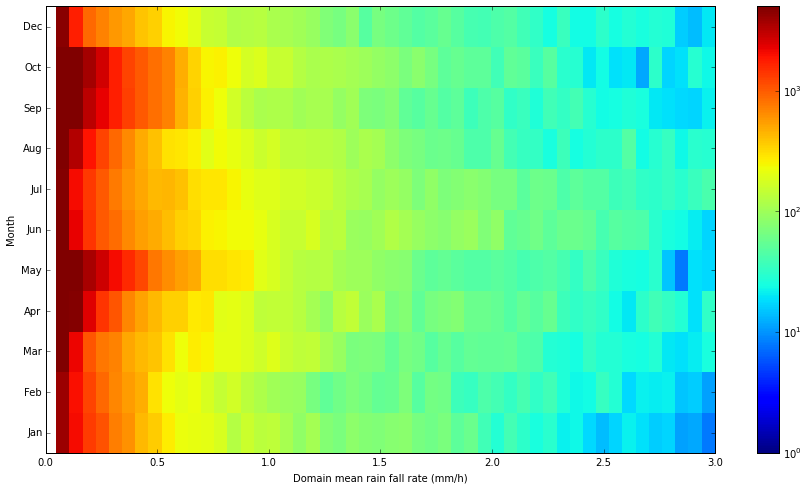

In [17]:
fig = plt.figure(figsize = [15,8])
plt.pcolormesh(bine2, months, hist_rf_monthly, norm=LogNorm(vmin=1, vmax=5000))
plt.ylabel('Month')
plt.xlabel('Domain mean rain fall rate (mm/h)')

plt.colorbar()
montext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Dec']
mty = plt.yticks(months + 0.5, montext)
plt.ylim([1,12])

(51,)
(24, 50)
23.0


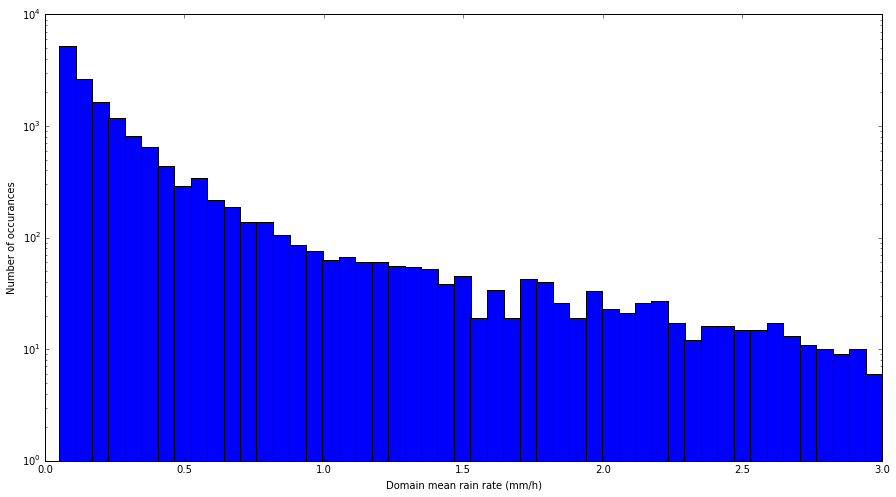

In [57]:
fig = plt.figure(figsize = [15,8])
print(bine.shape)
print(hist_rf.shape)
print(lt[4])
plt.bar(bine[0:-1], hist_rf[4,:], .06)
plt.xlim([0,3.0])
plt.yscale('log')
plt.ylabel('Number of occurances')
plt.xlabel('Domain mean rain rate (mm/h)')
#plt.pcolormesh(bine, hours, hist_rf, norm=LogNorm(vmin=1, vmax=5000))


(51,)
(24, 50)


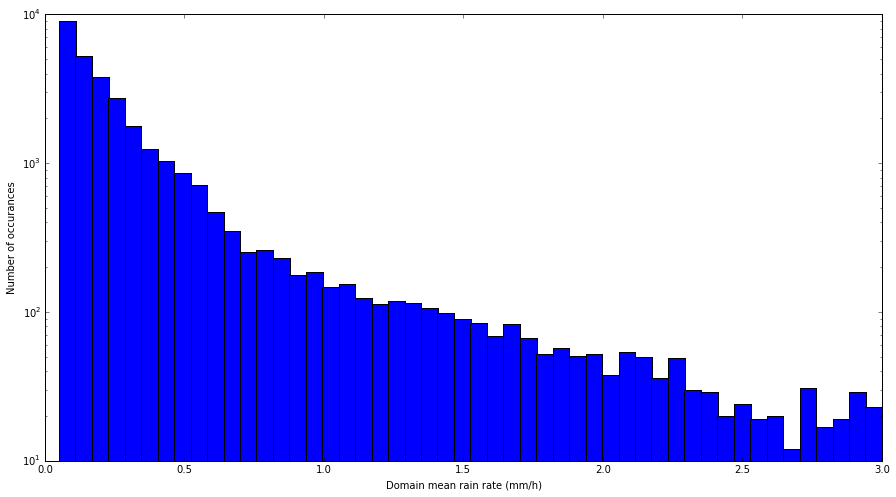

In [56]:
fig = plt.figure(figsize = [15,8])
print(bine2.shape)
print(hist_rf.shape)
plt.bar(bine2[0:-1], hist_rf_monthly[9,:], .06)
plt.xlim([0,3.0])
plt.yscale('log')
plt.ylabel('Number of occurances')
plt.xlabel('Domain mean rain rate (mm/h)')
#plt.pcolormesh(bine, hours, hist_rf, norm=LogNorm(vmin=1, vmax=5000))


51 12 (12, 50)


<matplotlib.colorbar.Colorbar instance at 0x11d46a878>

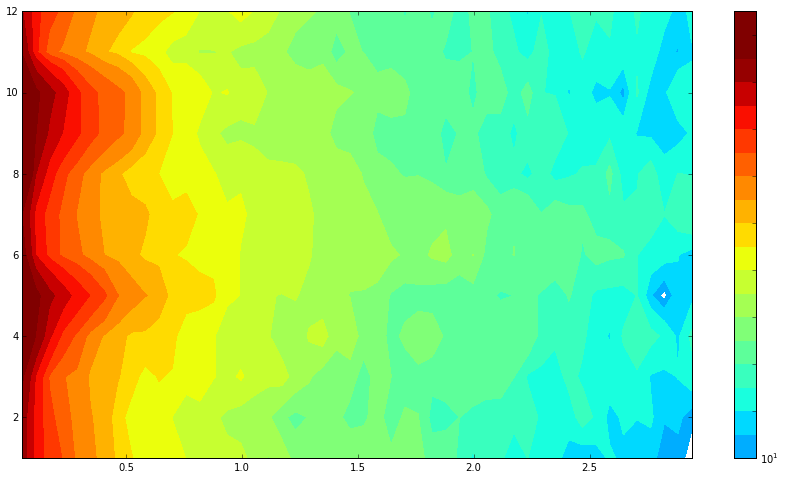

In [18]:
print(len(bine2), len(months), hist_rf_monthly.shape)
fig = plt.figure(figsize = [15,8])
plt.contourf(bine2[0:-1],months, hist_rf_monthly, 10**np.linspace(1,4,20), norm=LogNorm(vmin=1, vmax=5000))
plt.colorbar()


In [19]:
f = """
Timing: 
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:05:27 CST 2015
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:05:36 CST 2015
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:05:36 CST 2015
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
   2064   18576  152736
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:23:01 CST 2015
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
   4771   42939  353054
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
   8607   77463  636918
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:48:19 CST 2015
[scollis@blogin2 maine_out]$ 
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
  10627   95643  786398
[scollis@blogin2 maine_out]$ date
Tue Dec  1 21:01:35 CST 2015
[scollis@blogin2 maine_out]$ 

#!/bin/bash
#PBS -l nodes=16:ppn=16
#PBS -l walltime=03:59:00
#PBS -j oe
#PBS -V
#PBS -N IPythonMPI0

ipcluster start --n=256 --profile=mpi0
"""



In [20]:
outfile = netCDF4.Dataset('/Users/scollis/temp/maine.nc','w')
time = outfile.createDimension('time', None)
times = outfile.createVariable('time','f8',('time',))
mean_rfr = outfile.createVariable('Domain_mean_rainfall_rate','f8',('time',))
mean_rfr.units = 'mm/h'
mean_rfr[:] =  mean_rf
mean_rfr.standard_name = 'Rainfall Rate'
mean_rfr.long_name = 'Domain mean Rainfall Rate'

max_rfr = outfile.createVariable('Domain_max_rainfall_rate','f8',('time',))
max_rfr.units = 'mm/h'
max_rfr[:] =  max_rf
max_rfr.standard_name = 'Rainfall Rate'
max_rfr.long_name = 'Domain maximum Rainfall Rate'

times.units = 'hours since 1997-01-01 00:00:00.0'
times.calendar = 'gregorian'
times[:] = netCDF4.date2num(datetimes,units=times.units,calendar=times.calendar)
outfile.close()

In [21]:
outfile.close()

RuntimeError: NetCDF: Not a valid ID

In [ ]:
radar = pyart.io.read('/data/KGYX20071227_132045')

In [ ]:
plt.contourf? datetime.datetime.strptime(filen[4:-11]

In [ ]:
a = 'cfrad.20080528_045151.761_to_20080528_050012.052_KGYX_v130_Surveillance_SUR.nc.status'
print(datetime.datetime.strptime(a[6:21], '%Y%m%d_%H%M%S'))

In [ ]:
fh = open(status_dir+a)
line = fh.readline()[78::]
fh.close()

In [ ]:
print(line)

In [ ]:
for i in range(5):
    print(all_files[i+1][0:-7])
print('......')
for i in range(4):
    print(all_files[-(4-i)][0:-7])


In [ ]:
from IPython.parallel import Client
My_Cluster = Client()
My_View = My_Cluster[:]
My_View.block = False
#on all engines do an import of Py-ART
My_View.execute('import matplotlib')
My_View.execute('matplotlib.use("agg")')
My_View.execute('import pyart')
#Map the code and input to all workers
result = My_View.map_async(do_grid_map_gates_to_grid, good_files)
#Reduce the result to get a list of output
rain_rates = result.get()